## Introduction

This document is to introduce **mSPRT**(mixture sequential probability ratio test) described in Optimizely's paper [1].

## One-sample mSPRT

For a single stream of data $X_{1},...., X_{n}$ from a distribution with parameter $\theta$ taking values in $\Theta \subset R$, we want to test the following hypotheses:

$$H_{0}: \theta = \theta_{0}$$
$$H_{a}: \theta \neq \theta_{0}$$

The test is defined by a mixing distribution $H$ over $\Theta$, where $H$ is assumed to have a density $h$ that is positive everywhere. Using $H$, we first compute the following mixture of likelihood ratios against the null hypothesis that $\theta = \theta_{0}$:

$$\Lambda^{H, \theta_{0}}_{n} = \int_{\Theta} \prod^{n}_{m=1} \frac{f_{\theta}(X_{m})}{f_{\theta_{0}}(X_{m})} h(\theta) d\theta $$

Given a desired false positive probability $\alpha$, it stops and rejects the null hypothesis at **the first time** $T = T^{H}(\alpha)$ that $\Lambda^{H, \theta_{0}}_{n} > \alpha^{-1}$; if no such time exists, it never rejects the null hypothesis. Using standard martingale techniques, it can be shown that this sequential test control Type I error at level $\alpha$. 

For data generated by general exponential families, as long as an appropriate conjugate prior is chosen as $H$, computation of $\Lambda^{H, \theta_{0}}_{n}$ (and thus both always valid p-values and always valid confidence intervals) is inexpensive. For example, for data generated from a normal distribution(i.e. where $F_{\theta} = N(\theta, \sigma^{2}$)), it turns out that if we use a normal mixing distribution centered at the null hypothesis(i.e., $H = N(\theta_{0}, \tau^2)$, then we obtain a closed form formula for $\Lambda^{H,\theta_{0}}_{n}$:

$$\Lambda^{H,\theta_{0}}_{n} = \sqrt{\frac{V_{n}}{V_{n}+\tau}} \times exp \{ \frac{\tau }{2V_{n}(V_{n}+\tau)}(\overline{X}_{n} - \theta_{0})^{2}\},\ \ where\ V_{n} = \frac{\sigma^{2}}{n} \ \ \ \ \ (1)$$ [1]

## Always valid p-value process

The authors of Optimizely's paper define always valid p-value process as follows:


>A sequence of p-values ($p_{n}$) is an always valid p-value process if given any stopping time $T$, there holds:  
>  
>$$\forall \alpha \in [0, 1], P_{\theta_{0}}(p_{T} \le \alpha) \le \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it can be shown that $p_{n}$ satisfying the following simple recursion is an always valid p-value process:  
  
$$p_{0} = 1; p_{n} = min \{ p_{n-1}, 1/{\Lambda^{H, \theta_{0}}_{n}}\}$$ [1]

## Always valid confidence interval process

The author also define always valid confidence interval process as follows:

>A sequence of (1- $\alpha$)-level confidence intervals ($I_{n}$) is an always valid confidence interval process if for any stopping time $T$, the corresponding interval $I_{T}$ has $1 - \alpha$ coverage of the true parameter: 
>  
>$$\forall \theta \in \Theta, P_{\theta}(\theta \in I_{T}) \ge 1- \alpha $$


For a given mSPRT $\Lambda^{H, \theta_{0}}_{n}$ sequence, it also can be shown that $I_{n}$ satisfying the following simple recursion is an always valid confidence interval process:  

$$I_{0} = \Theta; I_{n} = I_{n-1} \cap \{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$$ [1]


Using the equation (1), we can derive the range of $\theta$ that satisifies $\{\theta: \Lambda^{H, \theta}_{n} \ge \alpha^{-1}\}$, i.e.


$$\overline{X}_{n} \pm \sqrt{\frac{V_{n}(V_{n}+\tau)}{\tau}(-2\log(\alpha)-\log(\frac{V_{n}}{V_{n}+\tau})}$$


## Two-sample mSPRT

To get an mSPRT for A/B testing, we need to define a mixture likelihood ratio ${\Lambda^{H, \theta_{0}}_{n}}$ for two-variation experiments, as a function of the data $X_{1},...., X_{n}, Y_{1},... Y_{n}$. We start by considering normal data. In this case, note that for any $\mu^{A}$ and $\mu^{B}$, $Z_{n} = Y_{n} - X_{n}$. We can thus simply apply the one-variation mSPRT to the sequence {$Z_{n}$}. The equation (1) continues to hold for this case except that we need to use $\ V_{n} = \frac{2\sigma^{2}}{n}$. 

## Choice of $\tau$ parameter

Use $\tau = 0.0001$.

## Sample size estimation

The following formula provides a reasonable approximation to the average sample size:

$E[N_{\delta}] = \frac{v_{x}+v_{y}}{\delta^{2}}\{log(-2 \tau e^{\delta^{2}/\tau} \log(\alpha)) - log(\delta^{2} \alpha^{2}) - 1\}$, where $\delta$ is the effect size.

$E[N_{\delta_{1-\beta}}] = (0.35 - 0.79\log(\beta)) E[N_{\delta}]$.

[2]

## Multiple Comparison Correction - TBD

Use Benjamini-Hochberg method to control FDR(false discovery rate). This method is less strict than Bonferroni correction method in control type I error but has greater power.

## Python prototype implementaion

In [1]:
import sys
import numpy as np
import pandas as pd
import util.helper as helper
import util.msprt_core as msprt_core
import util.sim_msprt as sim_msprt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

### The calc_stat fuction in msprt_core.py provides output statistics based on mSPRT.
### Two usage examples:

In [4]:
ret = msprt_core.calc_stat(sa=1817, na=9201, sb=1862, nb=9201, alpha=0.05, tau_option=3, tau_constant=0.0001)
ret

{'cvr_data': [1817, 9201, 1862, 9201],
 'cvr_a': 0.19747853494185413,
 'cvr_b': 0.2023693076839474,
 'effect': 0.004890772742093263,
 'tau': 0.0001,
 'V': 3.4767605061465084e-05,
 'Lambda': 0.6556137099183748,
 'decision_boundary': 0.01855305233286208,
 'burnIn': 300,
 'p_value': 1,
 'effect_ci': [-0.013662279590768815, 0.023443825074955342],
 'msprt_res': 'U'}

In [6]:
ret = msprt_core.calc_stat(sa=250, na=11221, sb=1600, nb=14187, alpha=0.05, tau_option=3, tau_constant=0.0001)
ret

{'cvr_data': [250, 11221, 1600, 14187],
 'cvr_a': 0.02227965421976651,
 'cvr_b': 0.11277930499753296,
 'effect': 0.09049965077776645,
 'tau': 0.0001,
 'V': 8.994240189472143e-06,
 'Lambda': 7.519045499190073e+180,
 'decision_boundary': 0.00912094866293338,
 'burnIn': 300,
 'p_value': 1.3299560431011046e-181,
 'effect_ci': [0.08137870211483307, 0.09962059944069983],
 'msprt_res': 'B'}

### The possible range of each output statistic:

cvr_a $\in$ [0, 1]         
cvr_b $\in$ [0, 1]       
effect $\in$ [-1, 1]        
tau $\in$ [0, 1]   
V $\ge$ 0  
Lambda $\in$ (0, $\infty$)       
decision_boundary $\in$ (0, $\infty$)      
p_value $\in$ (0, 1]       
effect_ci[0] $\in$ [-1000, 1000]        
effect_ci[1] $\in$ [-1000, 1000]  & effect_ci[1] $\gt$ effect_ci[0]

### An example to demonstrate how always valid p-value and confidence interval are computed recursively. 

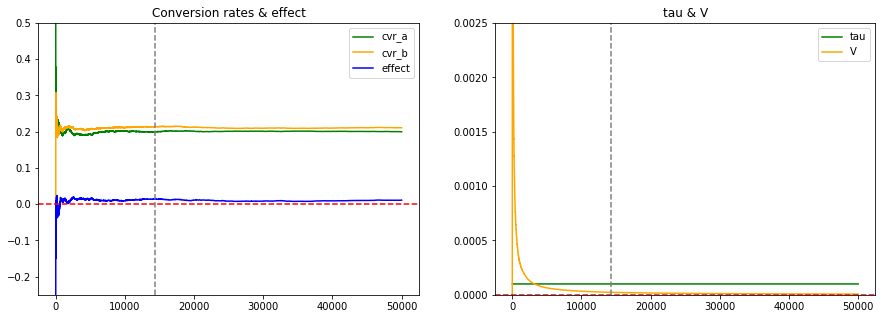

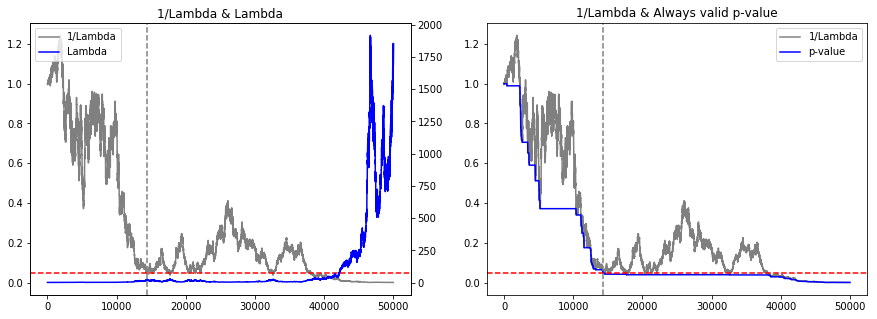

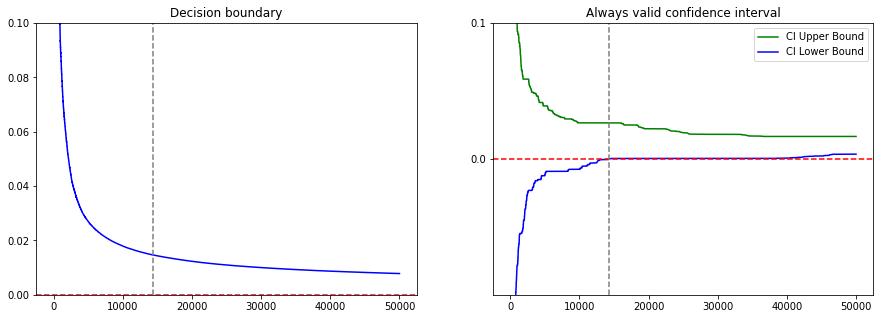

In [16]:
np.random.seed(2019)

n = 50000
x = np.cumsum(np.random.binomial(1, 0.2, n))
y = np.cumsum(np.random.binomial(1, 0.21, n))

cvr_a, cvr_b, effect, tau, V, Lambda, decision_boundary, p_val, sig_val, ci_lb, ci_ub, res = ([] for i in range(12))
prev_p_val = 1
prev_effect_ci = [-1000,1000]

for i in range(n):
    sa = x[i]
    sb = y[i]
    
    ret = msprt_core.calc_stat(sa, i+1, sb, i+1, 
                               alpha=0.05, tau_option=3, tau_constant=0.0001,
                               prev_p_value=prev_p_val,
                               prev_effect_ci=prev_effect_ci)
    
    cvr_a.append(ret['cvr_a'])
    cvr_b.append(ret['cvr_b'])
    effect.append(ret['effect'])
    tau.append(ret['tau'])
    V.append(ret['V'])
    Lambda.append(ret['Lambda'])
    decision_boundary.append(ret['decision_boundary'])
    p_val.append(ret['p_value'])
    effect_ci = ret['effect_ci']
    res.append(ret['msprt_res'])

    sig_val.append(1-p_val[-1])
    ci_lb.append(effect_ci[0])
    ci_ub.append(effect_ci[1])
    
    prev_p_val = p_val[-1]
    prev_effect_ci = effect_ci

sig_loc = np.where(np.array(sig_val)>0.95)[0][0]  

# Set 1: plot conversion rates, effect, tau, V
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(cvr_a, color='green', label='cvr_a')
plt.plot(cvr_b, color='orange', label='cvr_b')
plt.plot(effect, color='blue', label='effect')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.25,0.5])
plt.title('Conversion rates & effect')
plt.legend()

plt.subplot(122)
plt.plot(tau, color='green', label='tau')
plt.plot(V, color='orange', label='V')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,0.0025])
plt.legend()
plt.title('tau & V')
plt.show()

# Set 2: plot Lambda, 1/Lambda, always valid p-value
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax2 = ax1.twinx()
ax1.plot([1/x for x in Lambda], color='grey', label='1/Lambda')
ax2.plot(Lambda, color='blue', label='Lambda')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.axhline(y=0.05, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.title('1/Lambda & Lambda')

plt.subplot(122)
plt.plot([1/x for x in Lambda], color='grey', label='1/Lambda')
plt.plot(p_val, color='blue', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.title('1/Lambda & Always valid p-value')
plt.legend()
plt.show()

# Set 3: plot decision boundary, always valid confidence interval
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(decision_boundary, color='blue')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([0,0.1])
plt.title('Decision boundary')

plt.subplot(122)
plt.plot(ci_ub, color='green', label='CI Upper Bound')
plt.plot(ci_lb, color='blue', label='CI Lower Bound')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.1,0.1])
plt.yticks([0.0, 0.1])
plt.title('Always valid confidence interval')
plt.legend()
plt.show()


Reset policy to handle special situations

## Simulation

### Type 1 error control

The following simulation shows the Type 1 error rate is controlled under 5% when $\alpha$ is set to 0.05. 

In [15]:
ss = helper.sample_size(mu=0.5, relative_mde_value=0.02, pr=True)
sim_data1 = sim_msprt.sim_peeking(muA=0.50, muB=0.50, sample_size=ss['variant_sample_size']*5, 
                                  n_experiments=1000, n_peeks=-1, start=1,
                                  alpha=0.05, tau_option=3, tau_constant=0.0001,
                                  burnIn=0, random_seed=2020, pr_peek=10000)

Sample size for mu=0.5000, relative_mde_value=0.0200, absolute_mde_value=0.0100, alpha=0.0500, beta=0.0500:
variant_sample_size=64,961, total_sample_size=129,921
[Start time]:2020-01-20 21:40:32
[Parameters]: muA:0.5, muB:0.5, sample_size:324,805, n_experiments:1,000, relative_mde_value:0.02000, alpha:0.050, tau_option:3, tau_constant:0.0001, burnIn:0, random_seed:2020, n_peeks:-1, start:1, step: 1
[01-20 21:43:29]: Peek #10,000 @ 10,000 samples, avg_sig_effect:0.00000, avg_effect:0.00554, msprt_res:{'U': 993, 'A': 5, 'B': 2}
[01-20 21:46:16]: Peek #20,000 @ 20,000 samples, avg_sig_effect:0.00000, avg_effect:0.00397, msprt_res:{'U': 992, 'A': 5, 'B': 3}
[01-20 21:48:57]: Peek #30,000 @ 30,000 samples, avg_sig_effect:0.00000, avg_effect:0.00328, msprt_res:{'U': 988, 'A': 8, 'B': 4}
[01-20 21:51:14]: Peek #40,000 @ 40,000 samples, avg_sig_effect:0.00000, avg_effect:0.00283, msprt_res:{'U': 981, 'A': 12, 'B': 7}
[01-20 21:53:31]: Peek #50,000 @ 50,000 samples, avg_sig_effect:0.00000, avg_

### Power analysis

The following simulation shows the actual average sample size is very close to what the above formula estimates.

In [12]:
sim_data1 = sim_msprt.sim_peeking(muA=0.20, muB=0.204, sample_size=1000000, 
                                  n_experiments=1000, n_peeks=1000, start=1, 
                                  alpha=0.05, tau_option=3, tau_constant=0.0001, 
                                  burnIn=0, random_seed=2019, pr_peek=100)

[Start time]:2020-01-20 21:37:59
[Parameters]: muA:0.2, muB:0.204, sample_size:1,000,000, n_experiments:1,000, relative_mde_value:0.02000, alpha:0.050, tau_option:3, tau_constant:0.0001, burnIn:0, random_seed:2019, n_peeks:1,000, start:1, step: 1,001
[01-20 21:38:39]: Peek #100 @ 99,100 samples, avg_sig_effect:0.00596, avg_effect:0.00328, msprt_res:{'U': 685, 'B': 315}
[01-20 21:38:40]: Peek #200 @ 199,200 samples, avg_sig_effect:0.00411, avg_effect:0.00284, msprt_res:{'B': 628, 'U': 372}
[01-20 21:38:41]: Peek #300 @ 299,300 samples, avg_sig_effect:0.00341, avg_effect:0.00255, msprt_res:{'B': 835, 'U': 165}
[01-20 21:38:41]: Peek #400 @ 399,400 samples, avg_sig_effect:0.00000, avg_effect:0.00242, msprt_res:{'B': 925, 'U': 75}
[01-20 21:38:41]: Peek #500 @ 499,500 samples, avg_sig_effect:0.00000, avg_effect:0.00228, msprt_res:{'B': 973, 'U': 27}
[01-20 21:38:41]: Peek #600 @ 599,600 samples, avg_sig_effect:0.00000, avg_effect:0.00203, msprt_res:{'B': 989, 'U': 11}
[01-20 21:38:41]: Pee

In [7]:
_ = msprt_core.estimate_sample_size2(mu=0.2, relative_mde_value=0.02, alpha=0.05)

muA: 0.20000, muB: 0.20400, relative_mde_value: 0.02000, variant_sample_size: 176,795


## Production implementation consideration

In the production setting, we only apply mSPRT to daily cumulative conversion rate data and find **the first date** when test statistics reject the null hypothesis. The test is deemed to be conclusive from this fist date onward. Below we use the daily cumulative conversion rate data from Maxymizer **MM-AG042** experiement to demonstrate how to apply mSPRT in the production setting. $\alpha$ = 0.05 is used.

In [13]:
df = pd.read_csv('./backtesting/data/t288_daily.csv')
df['date2'] = pd.to_datetime(df.date)
print(df.cntr_gen.sum(), df.test_gen.sum(), df.cntr_act.sum(), df.test_act.sum(), df.shape)
df.head(2)

218360.0 346535 35572.0 58462 (94, 13)


,date,cntr_gen,test_gen,cntr_gen_cumu,test_gen_cumu,cntr_act,test_act,cntr_act_cumu,test_act_cumu,cntr_cvr_cumu,test_cvr_cumu,lift_cumu,date2
0,2017-08-29,1028.0,1098,1028.0,1098,213.0,214,213.0,214,0.207198,0.194900,-0.059357,2017-08-29
1,2017-08-30,3329.0,3289,4357.0,4387,584.0,581,797.0,795,0.182924,0.181217,-0.009331,2017-08-30


33
Ran for 94 days, lift=3.56%
Control: gen=218,360.0, action=35,572.0, cvr_rate:16.29%
varC   : gen=346,535, action=58,462, cvr_rate:16.87%
Test conculsive on 33th day(50,207 samples, lift=4.03%)

Based on lift=4.03%:
T-test sample size: 83,554 needed
mSPRT sample size: 51,789 needed
p-value:0.00000


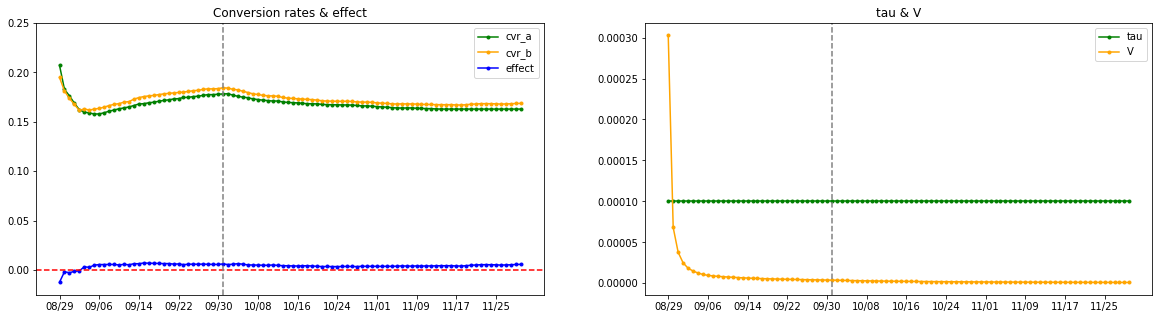

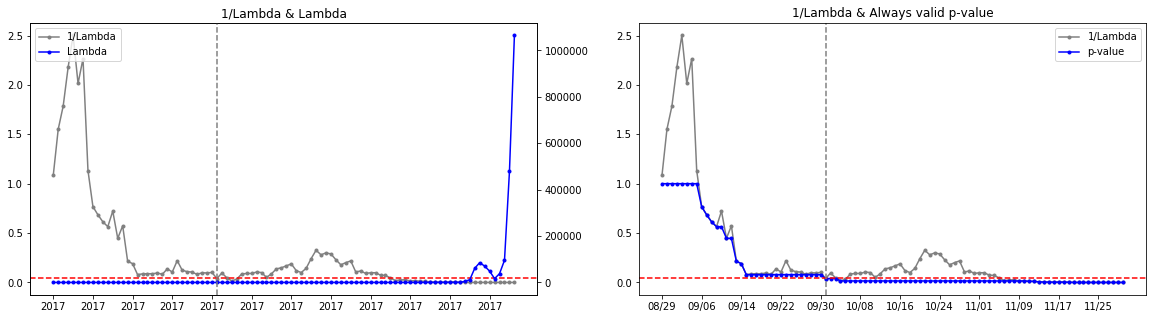

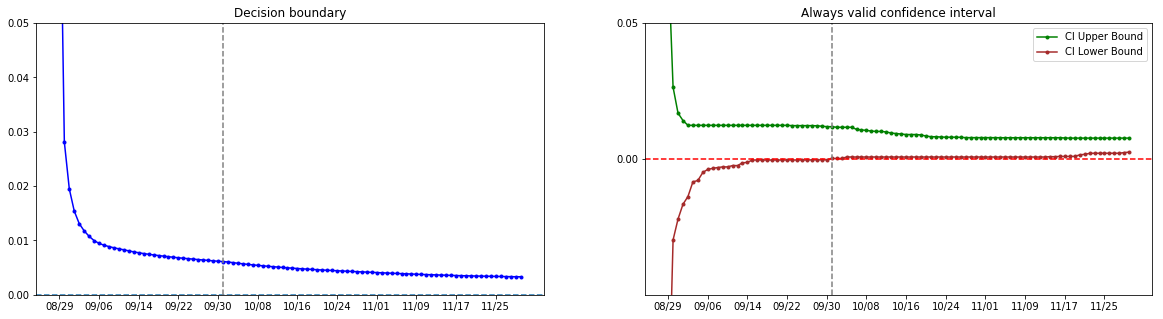

In [14]:
cvr_a, cvr_b, effect, tau, V, Lambda, decision_boundary, p_val, sig_val, ci_lb, ci_ub, res = ([] for i in range(12))
prev_p_val = 1
prev_effect_ci = [-1000,1000]

for i in range(len(df)):
    
    sa = df.cntr_act_cumu[i]
    na = df.cntr_gen_cumu[i]
    sb = df.test_act_cumu[i]
    nb = df.test_gen_cumu[i]
    
    # apply mSPRT
    ret = msprt_core.calc_stat(sa, na, sb, nb, 
                               alpha=0.05, tau_option=3, tau_constant=0.0001,
                               prev_p_value=prev_p_val,
                               prev_effect_ci=prev_effect_ci)
    
    cvr_a.append(ret['cvr_a'])
    cvr_b.append(ret['cvr_b'])
    effect.append(ret['effect'])
    tau.append(ret['tau'])
    V.append(ret['V'])
    Lambda.append(ret['Lambda'])
    decision_boundary.append(ret['decision_boundary'])
    p_val.append(ret['p_value'])
    effect_ci = ret['effect_ci']
    res.append(ret['msprt_res'])
    
    sig_val.append(1-p_val[-1])
    ci_lb.append(effect_ci[0])
    ci_ub.append(effect_ci[1])
    
    prev_p_val = p_val[-1]
    prev_effect_ci = effect_ci
    
sig_loc = df.date2[np.where(np.array(sig_val)>0.95)[0][0]]
print(np.where(np.array(sig_val)>0.95)[0][0])
x_dates = [df.date2[i] for i in range(0, len(df.date2), 8)]

lr = df.iloc[-1]
print('Ran for {} days, lift={:.2f}%'.format(len(df), lr['lift_cumu']*100))
print('Control: gen={:,}, action={:,}, cvr_rate:{:.2f}%'
      .format(lr['cntr_gen_cumu'],lr['cntr_act_cumu'],lr['cntr_cvr_cumu']*100))
print('varC   : gen={:,}, action={:,}, cvr_rate:{:.2f}%'
      .format(lr['test_gen_cumu'],lr['test_act_cumu'],lr['test_cvr_cumu']*100))
print('Test conculsive on {}th day({:,} samples, lift={:.2f}%)'
      .format(np.where(np.array(p_val)<0.05)[0][0], df.iloc[19]['test_gen_cumu'], df.iloc[19]['lift_cumu']*100))

ts=helper.sample_size(0.1629, 0.0403)['variant_sample_size']
ms=msprt_core.estimate_sample_size2(0.1629, 0.0403, pr=False)['variant_sample_size']
td = (ts/lr['cntr_gen_cumu']-1)*len(df)
md = (ms/lr['cntr_gen_cumu']-1)*len(df)
print('\nBased on lift=4.03%:')
print('T-test sample size: {:,} needed'.format(ts))
print('mSPRT sample size: {:,} needed'.format(ms))
print('p-value:{:.5f}'.format(p_val[-1]))


#sig_loc=0
# Set 1: plot conversion rates, effect, tau, V
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, cvr_a, 'o-', markersize=3, color='green', label='cvr_a')
plt.plot(df.date2, cvr_b, 'o-', markersize=3, color='orange', label='cvr_b')
plt.plot(df.date2, effect, 'o-', markersize=3, color='blue', label='effect')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.ylim([-0.025,0.25])
plt.title('Conversion rates & effect')
plt.legend()

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, tau, 'o-', markersize=3, color='green', label='tau')
plt.plot(df.date2, V, 'o-', markersize=3, color='orange', label='V')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
#plt.ylim([0,0.00002])
plt.legend()
plt.title('tau & V')
plt.show()

# Set 2: plot Lambda, 1/Lambda, always valid p-value
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax12 = ax1.twinx()
ax1.plot(df.date2, [1/x for x in Lambda], 'o-', markersize=3, color='grey', label='1/Lambda')
ax12.plot(df.date2, Lambda, 'o-', markersize=3, color='blue', label='Lambda')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax12.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.axhline(y=0.05, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.title('1/Lambda & Lambda')

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, [1/x for x in Lambda], 'o-', markersize=3, color='grey', label='1/Lambda')
plt.plot(df.date2, p_val, 'o-', markersize=3, color='blue', label='p-value')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.title('1/Lambda & Always valid p-value')
plt.legend()
plt.show()

# Set 3: plot decision boundary, always valid confidence interval
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(121)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, decision_boundary, 'o-', markersize=3, color='blue')
plt.axhline(y=0.0, linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.xticks(x_dates)
plt.ylim([0,0.05])
plt.title('Decision boundary')

ax2 = plt.subplot(122)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.plot(df.date2, ci_ub, 'o-', markersize=3, color='green', label='CI Upper Bound')
plt.plot(df.date2, ci_lb, 'o-', markersize=3, color='brown', label='CI Lower Bound')
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(sig_loc, color='grey', linestyle='--')
plt.ylim([-0.05,0.05])
plt.yticks([0.0, 0.05])
plt.xticks(x_dates)
plt.title('Always valid confidence interval')
plt.legend()
plt.show()

#Ran for 94 days, lift=3.56%
#Control: gen=218,360.0, action=35,572.0, cvr_rate:16.29%
#varC   : gen=346,535, action=58,462, cvr_rate:16.87%
#Test conculsive on 33th day(50,207 samples, lift=4.03%)

#Based on lift=4.03%:
#T-test sample size: 83,554 needed
#mSPRT sample size: 50,035 needed
#p-value:0.00000

## Highlights of Properties

1. Don't need to specify mde or beta. Allow tradeoff between sample size and time  
2. Work for any interval: hourly, daily, weekly, etc.

## References:
    
[1] R. Johari, P. Koomen, L. Pekelis, and D. Walsh, "Peeking at a/b tests: Why it matters, and what to do about it," in Proceedings of the 23rd ACM SIGKDD International Conference
on Knowledge Discovery and Data Mining. ACM, 2017, pp. 1517–1525.

[2] Z. Zhao, M. Liu, and A. Deb, "Safely and Quickly Deploying New Features with a Staged Rollout Framework Using Sequential Test and Adaptive Experimental Design," in 3rd International Conference on Computational Intelligence and Applications (ICCIA). IEEE, 2018, pp. 59–70.